In [0]:
#importing neccesaary libraries
import tensorflow as tf
import pandas as pd
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint

#Loading the Fashion MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()



In [0]:
# Data reshaping and changes in datatype format
# X_train = X_train.reshape(X_train.shape[0], -1) #for normal mlp types
X_train = X_train.reshape(-1, 28, 28, 1)  #for the conv layer approac
X_train = X_train.astype('float32')
X_train /= 255


X_test = X_test.reshape(-1, 28, 28, 1) #check
X_test = X_test.astype('float32')
X_test /= 255



In [0]:
# Converting test vector to binary class matrix.
# y = to_categorical(np.array(data_train.iloc[:, 0]))
num_classes = 10
y_train_ohe = np_utils.to_categorical(Y_train, num_classes)
y_test_ohe = np_utils.to_categorical(Y_test, num_classes)

In [42]:
num_classes = 10

input_layer = Input(shape=(28,28,1))

flatten = Flatten()(input_layer)
dense1 = Dense(64, activation='relu')(flatten)
dense2=Dense(64, activation='relu')(dense1)
output = Dense(10, activation='softmax')(dense2)
new_model = Model(inputs=input_layer,outputs=output)
new_model.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling model
import keras
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Callbacks

model_fname='model2'
callbacks = [ModelCheckpoint(monitor='val_acc', filepath=model_fname + '.hdf5',
                             save_best_only=True, save_weights_only=True,
                             mode='min')]

In [44]:
# Training and Validation
batch_size = 128
num_classes = 10
epochs = 20
history = model2.fit(X_train, y_train_ohe,
          epochs=epochs,
          batch_size = batch_size,
          validation_data=(X_test, y_test_ohe),
          verbose=1,
         )
# score = new_model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.5791 - accuracy: 0.7969 - val_loss: 0.4530 - val_accuracy: 0.8392
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3981 - accuracy: 0.8569 - val_loss: 0.3999 - val_accuracy: 0.8578
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3573 - accuracy: 0.8702 - val_loss: 0.3827 - val_accuracy: 0.8612
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3342 - accuracy: 0.8773 - val_loss: 0.3603 - val_accuracy: 0.8735
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3207 - accuracy: 0.8818 - val_loss: 0.3606 - val_accuracy: 0.8668
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3034 - accuracy: 0.8893 - val_loss: 0.3669 - val_accuracy: 0.8680
Epoch 7/20
60000/60000 [==============================] - 2s 28us/st

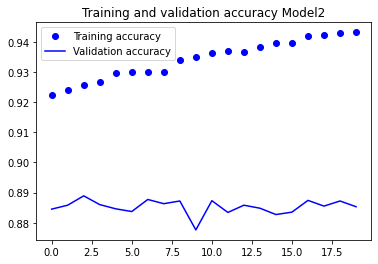

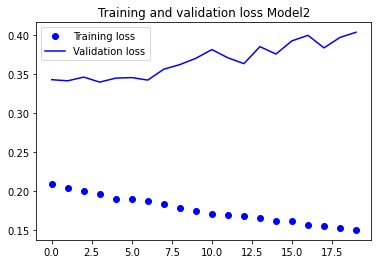

In [25]:
# Accuracy vs Loss
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy Model2')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss Model2')
plt.legend()
plt.show()

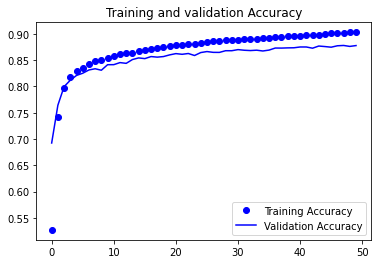

In [0]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.86      0.84      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.75      0.86      0.80      1000
     Class 3       0.91      0.87      0.89      1000
     Class 4       0.81      0.80      0.81      1000
     Class 5       0.96      0.97      0.96      1000
     Class 6       0.75      0.65      0.70      1000
     Class 7       0.95      0.94      0.95      1000
     Class 8       0.98      0.96      0.97      1000
     Class 9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [0]:
# Prediction
import numpy as np

predictions = model2.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes.shape
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

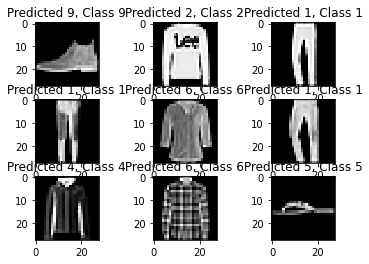

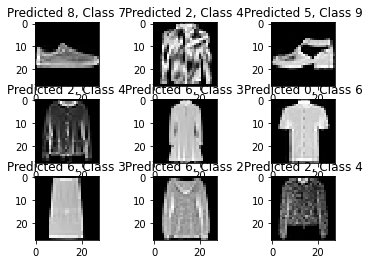

In [19]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))